# Decision Tree

Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB, MultinomialNB
# from sklearn.metrics import classification_report,confusion_matrix
# from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"Company_Data.csv")
print("data Shape:",data.shape)
data.tail()

data Shape: (400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


### EDA and Data Visualization

In [4]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print(data[data.duplicated()])


 Describe:
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max  

## Variable check

### Find columns with the same values

In [5]:
# Find columns with the same values
columns_with_same_values = data.columns[data.nunique() == 1].tolist()

for column in columns_with_same_values:
    unique_values = data[column].unique()
    print(f"Unique values in the '{column}' column:")
    print(unique_values)
    print()

# excluding columns_with_same_values
data = data.drop(columns=columns_with_same_values)
print("excluded columns_with_same_values, nos:",columns_with_same_values ,",Final shape:", data.shape)

excluded columns_with_same_values, nos: [] ,Final shape: (400, 11)


In [6]:
# Discrete Variables Count
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
print(discrete_feature)

# Continuous Feature Count
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('\nContinuous Feature Count {}'.format(len(continuous_feature)))
print(continuous_feature)

# Other Features Count
other_feature = [feature for feature in data.columns if feature not in discrete_feature and feature not in continuous_feature]
print('\nOther Features Count: {}'.format(len(other_feature)))
print('Other Features: {}'.format(other_feature))

# Numeric Data
numeric_data = data.select_dtypes(include='number')
print('\nNumeric Data Shape:', numeric_data.shape)
print(numeric_data.columns)

# Categorical Data
categorical_data = data.select_dtypes(include='object')
print('\nCategorical Data Shape:', categorical_data.shape)
print('Categorical Columns:', categorical_data.columns)

Discrete Variables Count: 4
['ShelveLoc', 'Education', 'Urban', 'US']

Continuous Feature Count 7
['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age']

Other Features Count: 0
Other Features: []

Numeric Data Shape: (400, 8)
Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

Categorical Data Shape: (400, 3)
Categorical Columns: Index(['ShelveLoc', 'Urban', 'US'], dtype='object')


## Categorical Data

Bar plot for all categorical

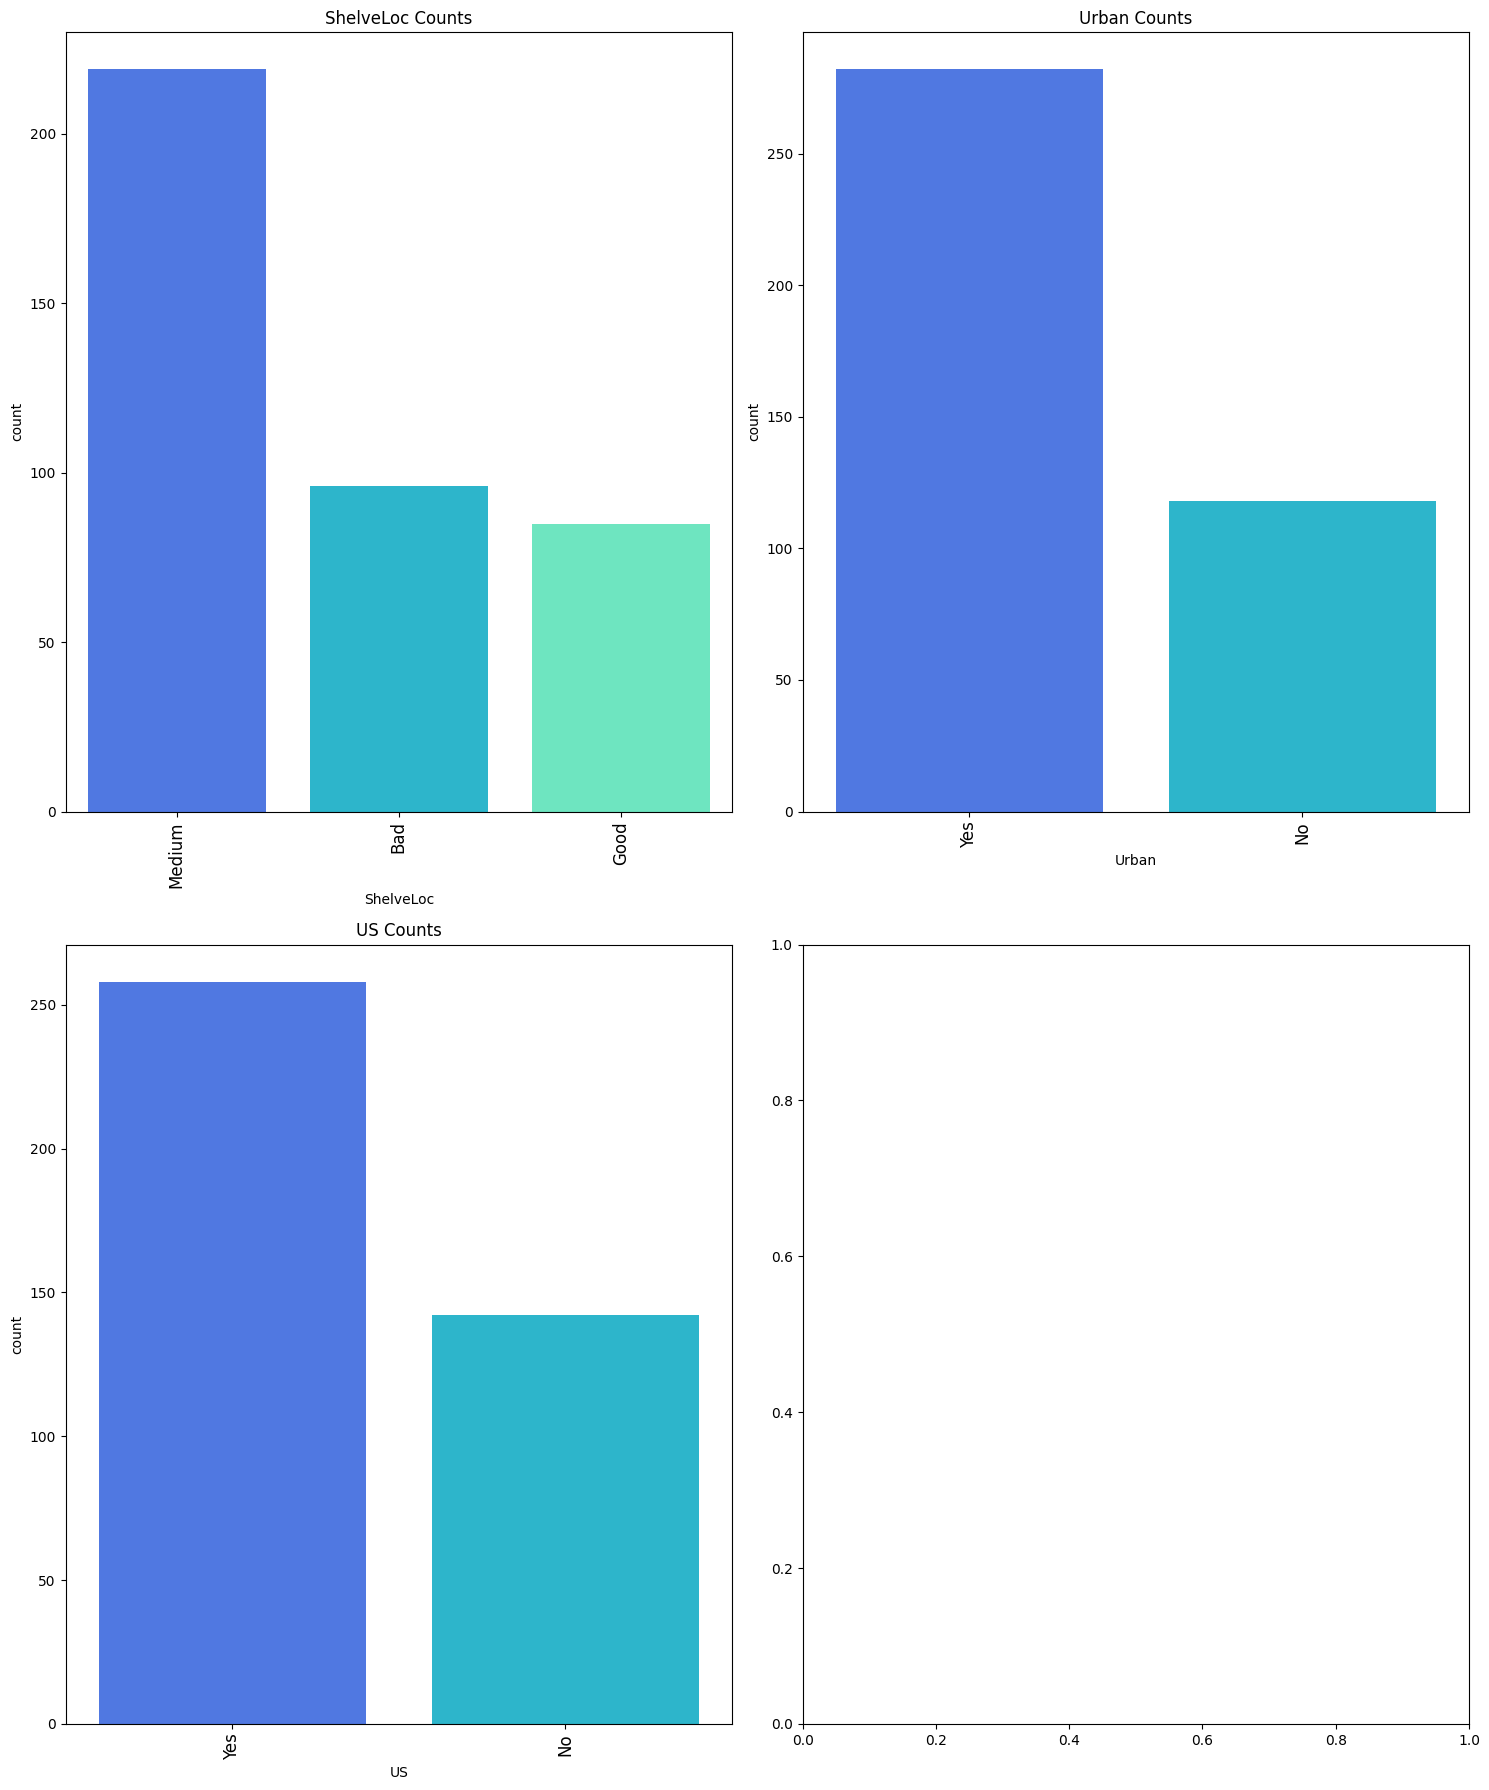

In [7]:
num_columns = len(categorical_data.columns)
num_rows = num_columns // 2 + num_columns % 2  # Ensure odd number of columns works correctly
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 9))

pal = sns.color_palette('rainbow')
for i, column in enumerate(categorical_data.columns):
    row_index = i // 2
    col_index = i % 2
    
    sns.countplot(x=column, data=categorical_data, palette=pal,
                  order=categorical_data[column].value_counts().index,
                  ax=axes[row_index, col_index])
    
    axes[row_index, col_index].set_xticklabels(axes[row_index, col_index].get_xticklabels(), rotation=90, fontsize=12)
    axes[row_index, col_index].set_title(f'{column} Counts')

# Adjust layout
plt.tight_layout()
plt.show()


### Labelencoder to convert categorical data into numeric

In [8]:
cat_data = categorical_data.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_data.columns:
    cat_data[column] = label_encoder.fit_transform(cat_data[column])
    
    print(f"\nLabel Encoding for {column}:")
    # print("\n", cat_data[column].value_counts())
    unique_values = categorical_data[column].unique()

    for value in unique_values:
        label = label_encoder.transform([value])[0]
        counts = cat_data[column].value_counts()[label]
        print(f"Value: {value} -> Label: {label} --> Counts: {counts}")
    


Label Encoding for ShelveLoc:
Value: Bad -> Label: 0 --> Counts: 96
Value: Good -> Label: 1 --> Counts: 85
Value: Medium -> Label: 2 --> Counts: 219

Label Encoding for Urban:
Value: Yes -> Label: 1 --> Counts: 282
Value: No -> Label: 0 --> Counts: 118

Label Encoding for US:
Value: Yes -> Label: 1 --> Counts: 258
Value: No -> Label: 0 --> Counts: 142


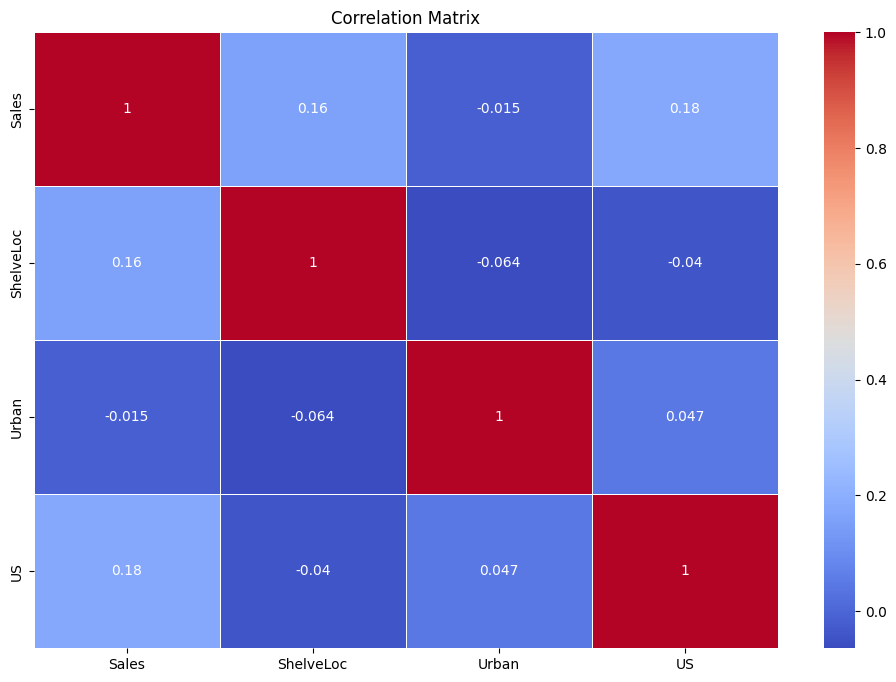

In [9]:
# Correlation Plot
cat_data=pd.concat([numeric_data['Sales'],cat_data],axis=1)
corr_matrix = cat_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

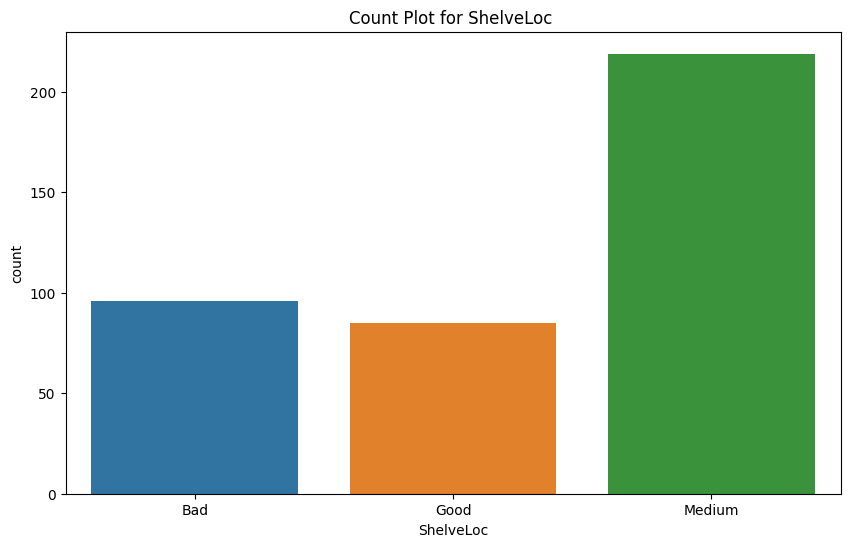

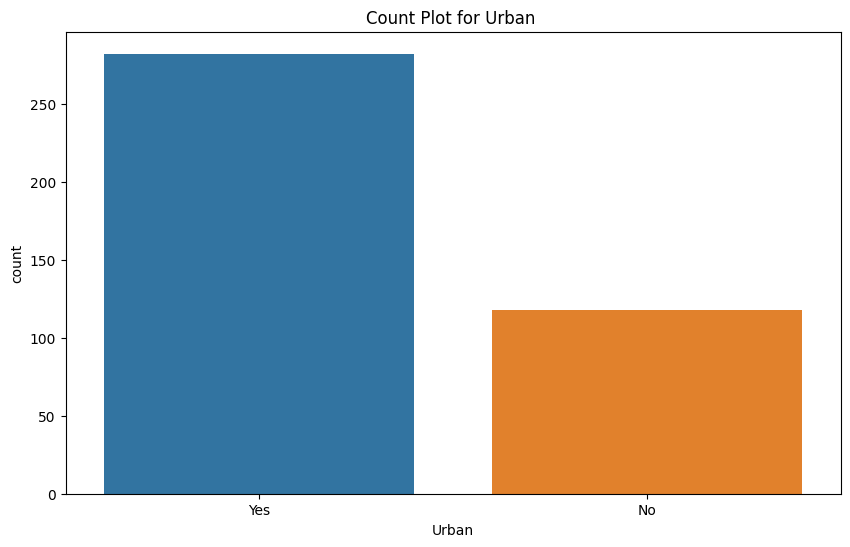

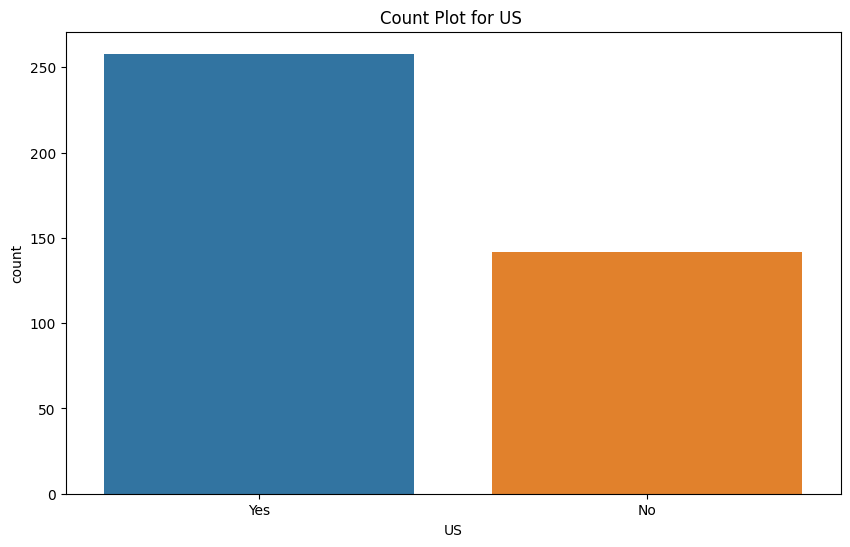

In [10]:
categorical_columns = categorical_data.columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=categorical_data, x=column)
    plt.title(f'Count Plot for {column} ')
    plt.show()

## Numeric Data

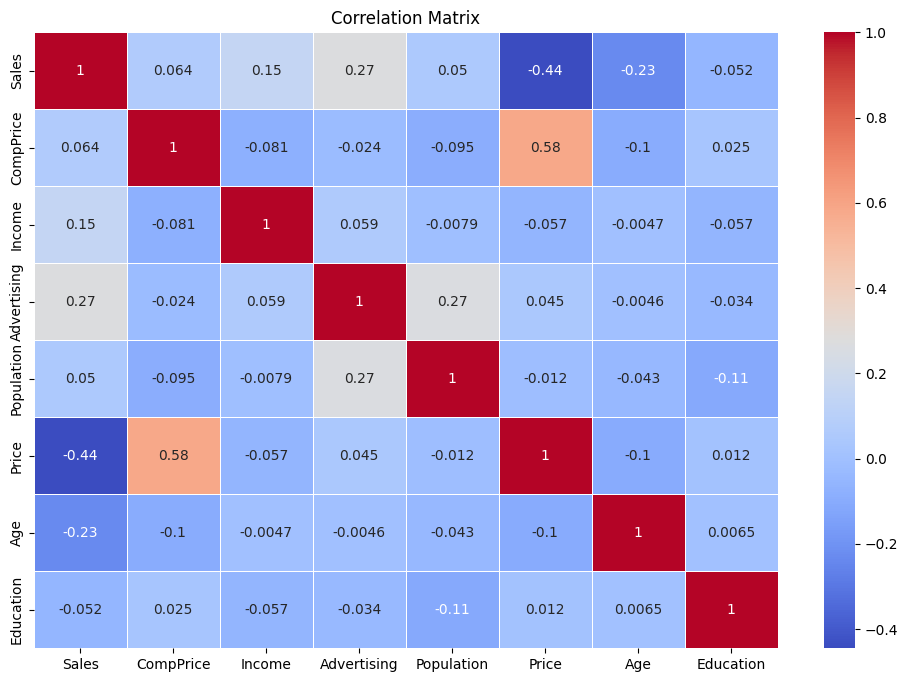

In [11]:
# Correlation Plot
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

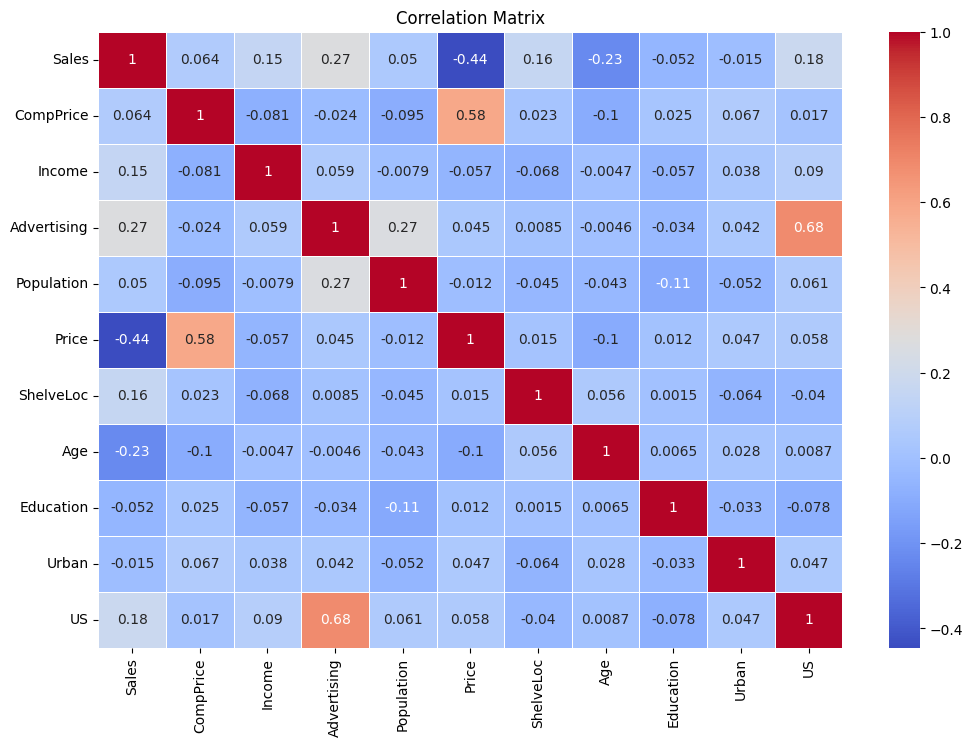

In [12]:
# Correlation Plot with All variable
data_2 = data.copy()
data_2[categorical_data.columns]=cat_data[categorical_data.columns]
corr_matrix = data_2.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### visualization

In [13]:
# # relationship plot for categorical data
# sns.pairplot(data= cat_data)
# plt.show()

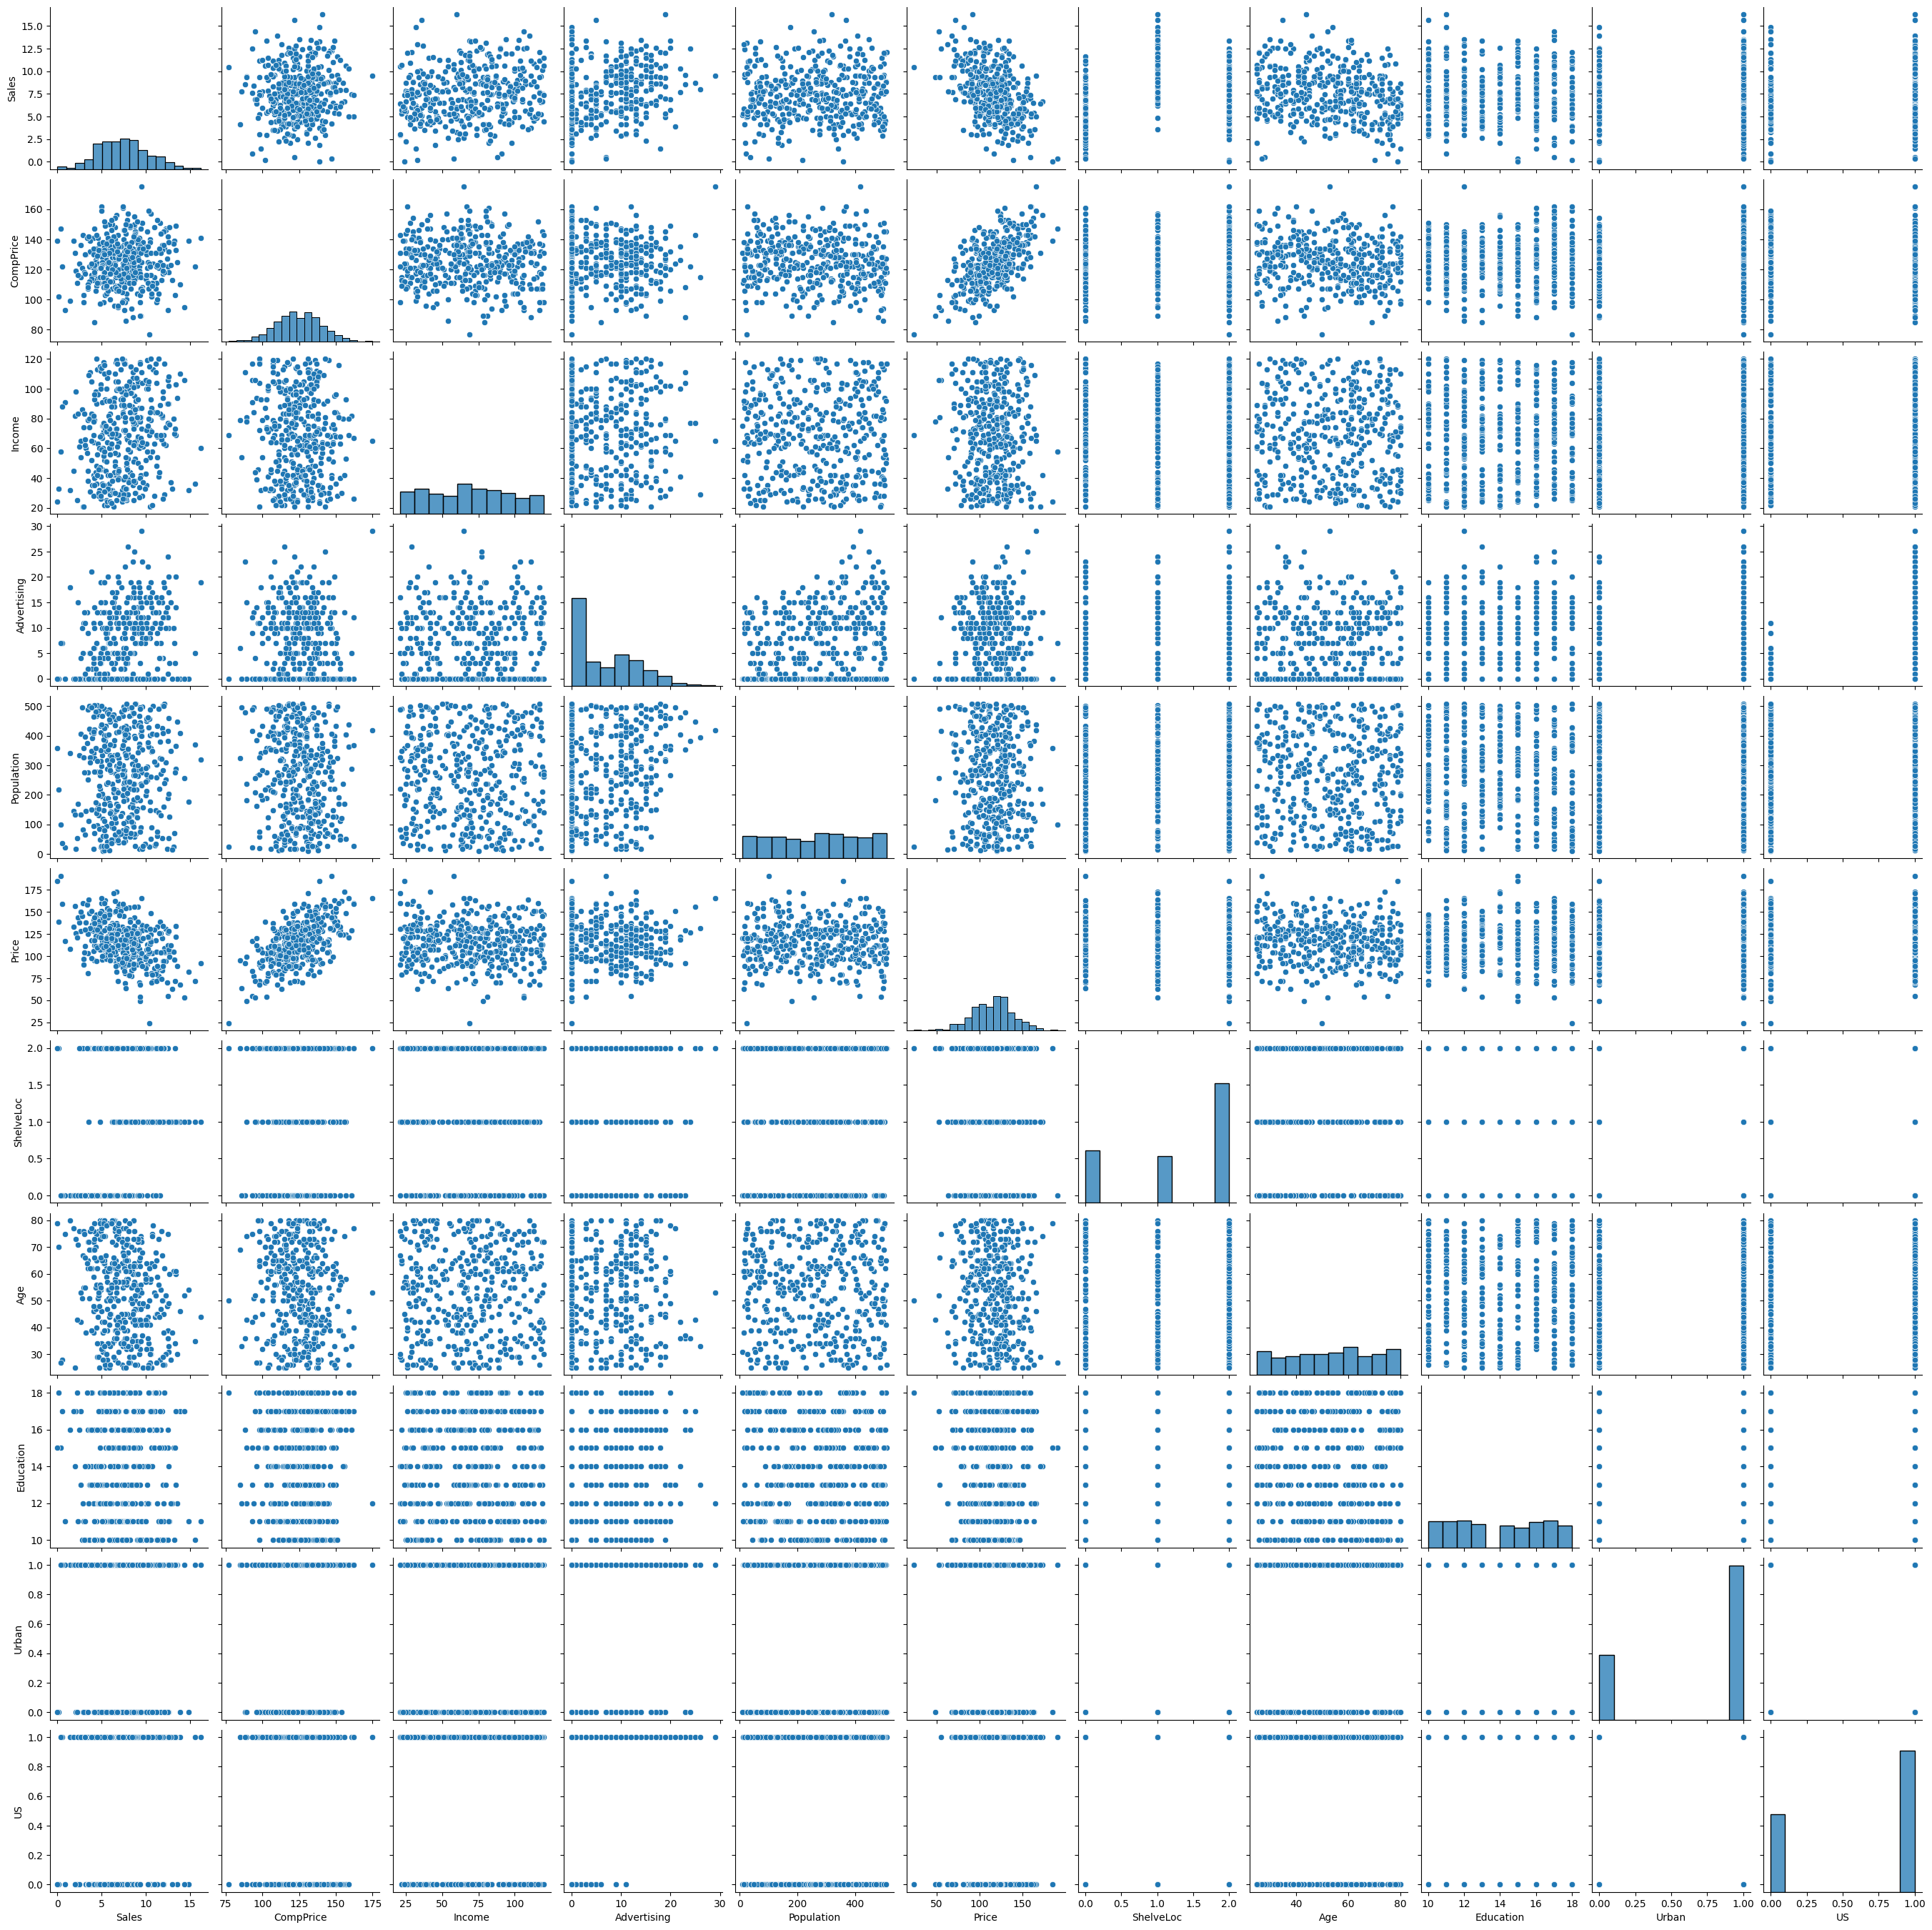

In [14]:
# relationship plot for numeric data
sns.pairplot(data= data_2)
plt.show()

### Detect outliers and handle them

In [15]:
data_filtered=data_2
# data_filtered=pd.concat([numeric_data,cat_data],axis=1)    #,cat_data ,numeric_data, data_2
data_filtered.shape

(400, 11)

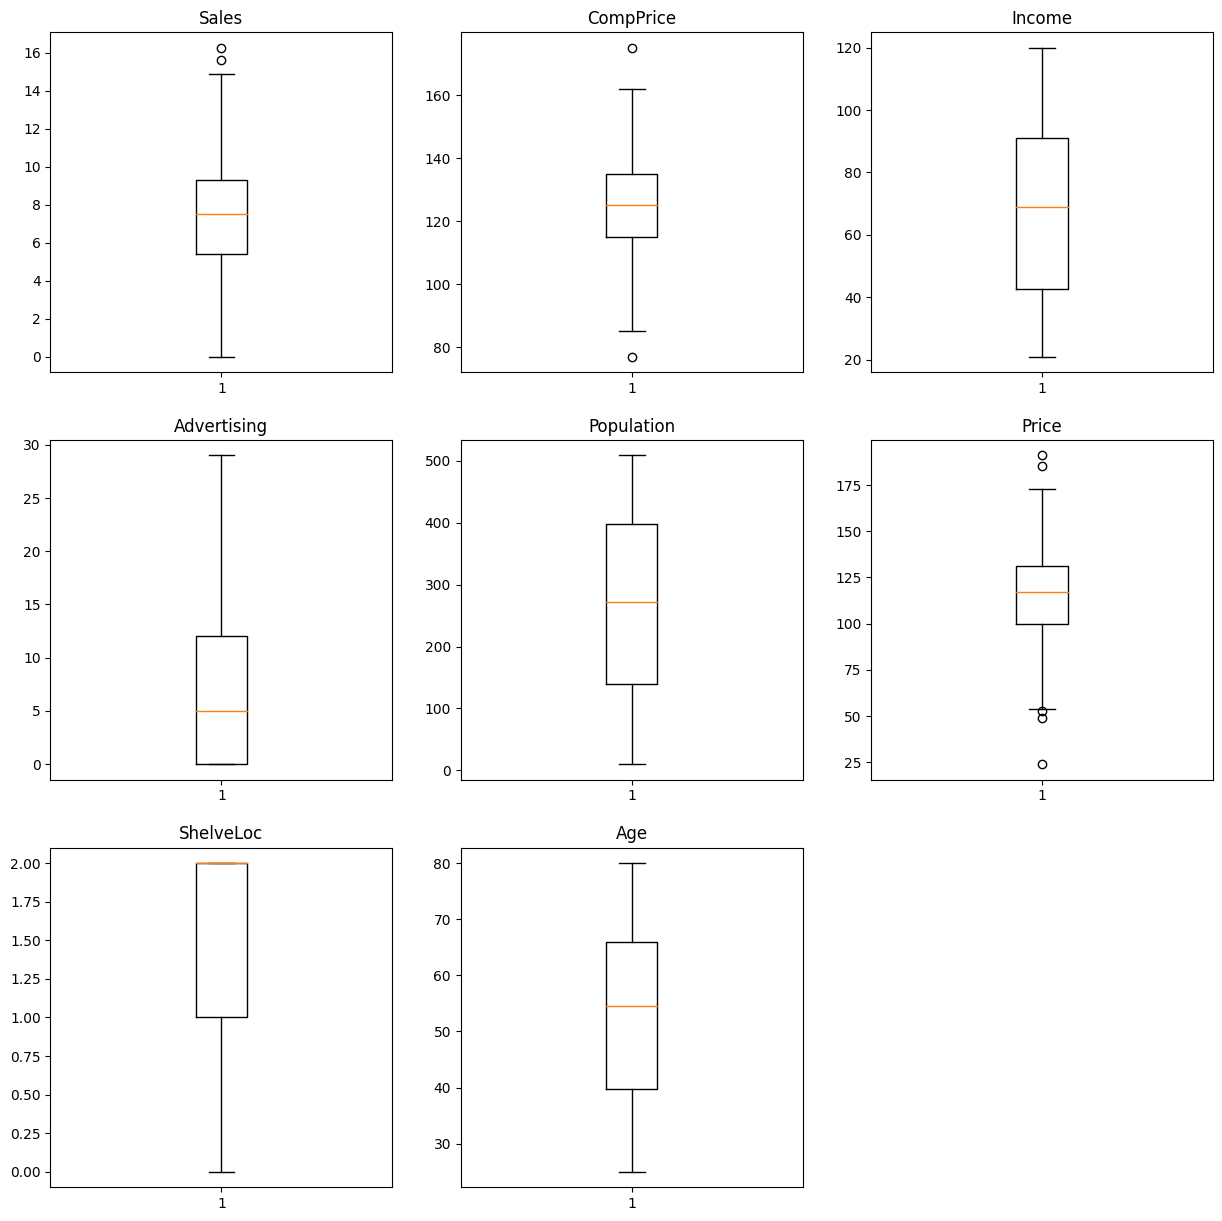

In [16]:
# display boxplots

num_columns = len(numeric_data.columns)
subplots_per_row = 3
num_rows = (num_columns + subplots_per_row - 1) // subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i in range(num_columns):
    ax = axes[i]
    ax.boxplot(data_filtered.iloc[:, i])
    ax.set_title(data_filtered.columns[i])

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


#### Treating outliers with IQR

In [17]:
num_columns = len(numeric_data.columns)
new_data = data_filtered.copy()

for i in range(num_columns):
    # print("\n\nColumn Name:",(data_filtered.columns[i]))
    print("\n\nColumn Name: \033[1;34m" + "\033[1m" + data_filtered.columns[i] + "\033[0m")

    # Calculate the IQR
    Q1 = data_filtered.iloc[:, i].quantile(0.25)
    Q3 = data_filtered.iloc[:, i].quantile(0.75)
    IQR = Q3 - Q1
        
    # Identify and mark outliers using IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(data_filtered[(data_filtered.iloc[:, i] > upper_bound) | (data_filtered.iloc[:, i] < lower_bound)].tail(2))
    
    # # Changing the outliers
    # new_data.loc[(new_data[data_filtered.columns[i]] > upper_bound), data_filtered.columns[i]] = upper_bound
    # new_data.loc[(new_data[data_filtered.columns[i]] < lower_bound), data_filtered.columns[i]] = lower_bound
    
    # # Drop rows with outliers
    # outliers = new_data[(new_data.iloc[:, i] < lower_bound) | (new_data.iloc[:, i] > upper_bound)].index   
    # new_data = new_data.drop(outliers)
    
print("\nShape of new data:",new_data.shape)
# sns.boxplot(data = new_data)
# plt.show()




Column Name: Sales
     Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
316  15.63        122      36            5         369     72          1   35   
376  16.27        141      60           19         319     92          1   44   

     Education  Urban  US  
316         10      1   1  
376         11      1   1  


Column Name: CompPrice
     Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
42   10.43         77      69            0          25     24          2   50   
310   9.53        175      65           29         419    166          2   53   

     Education  Urban  US  
42          18      1   0  
310         12      1   1  


Column Name: Income
Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []


Column Name: Advertising
Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban,

Note: not removing outliers, 

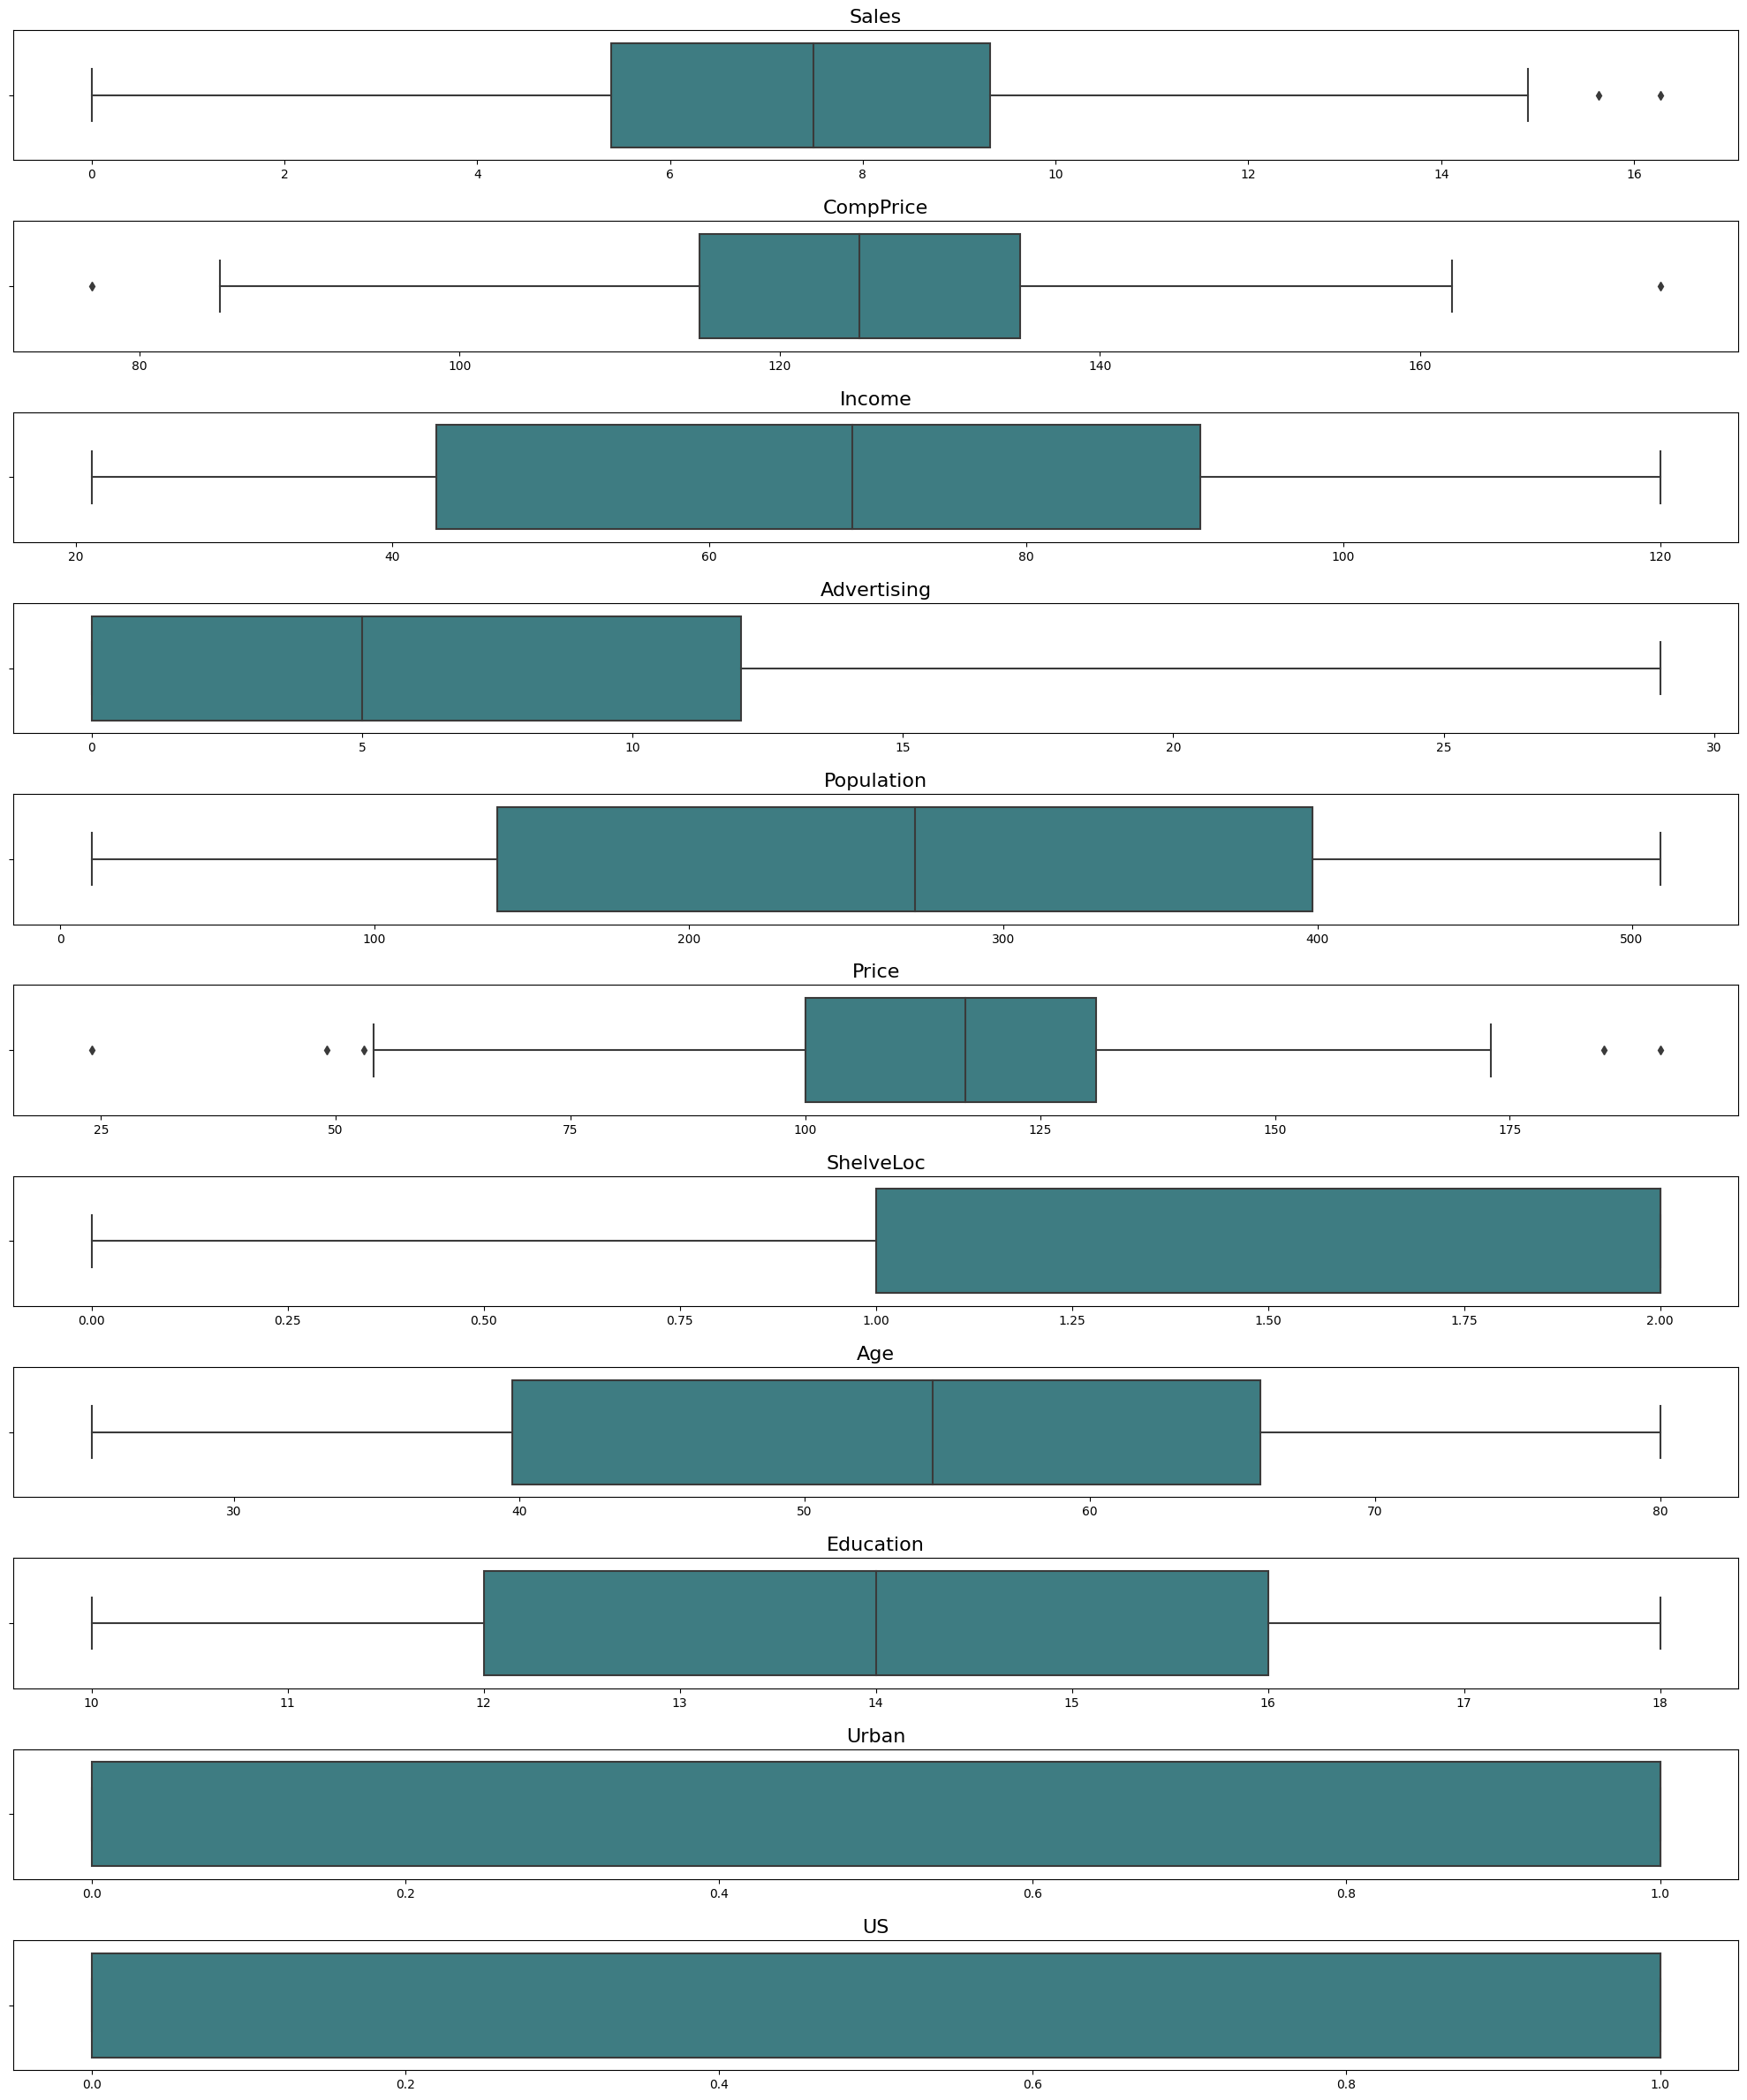

In [18]:
# display boxplots of Treated outliers with IQR

# Display boxplots
# Create subplots
fig, axes = plt.subplots(len(new_data.columns), 1, figsize=(20, 24), sharex=False, sharey=False)

# Loop through each variable and create boxplots
for i, variable in enumerate(new_data):
    sns.boxplot(x=variable, data=new_data, palette='crest', ax=axes[i])
    axes[i].set_title(f'{variable}', fontsize=16) 
    axes[i].set_xlabel('')  

plt.tight_layout(pad=1.5)
plt.show()


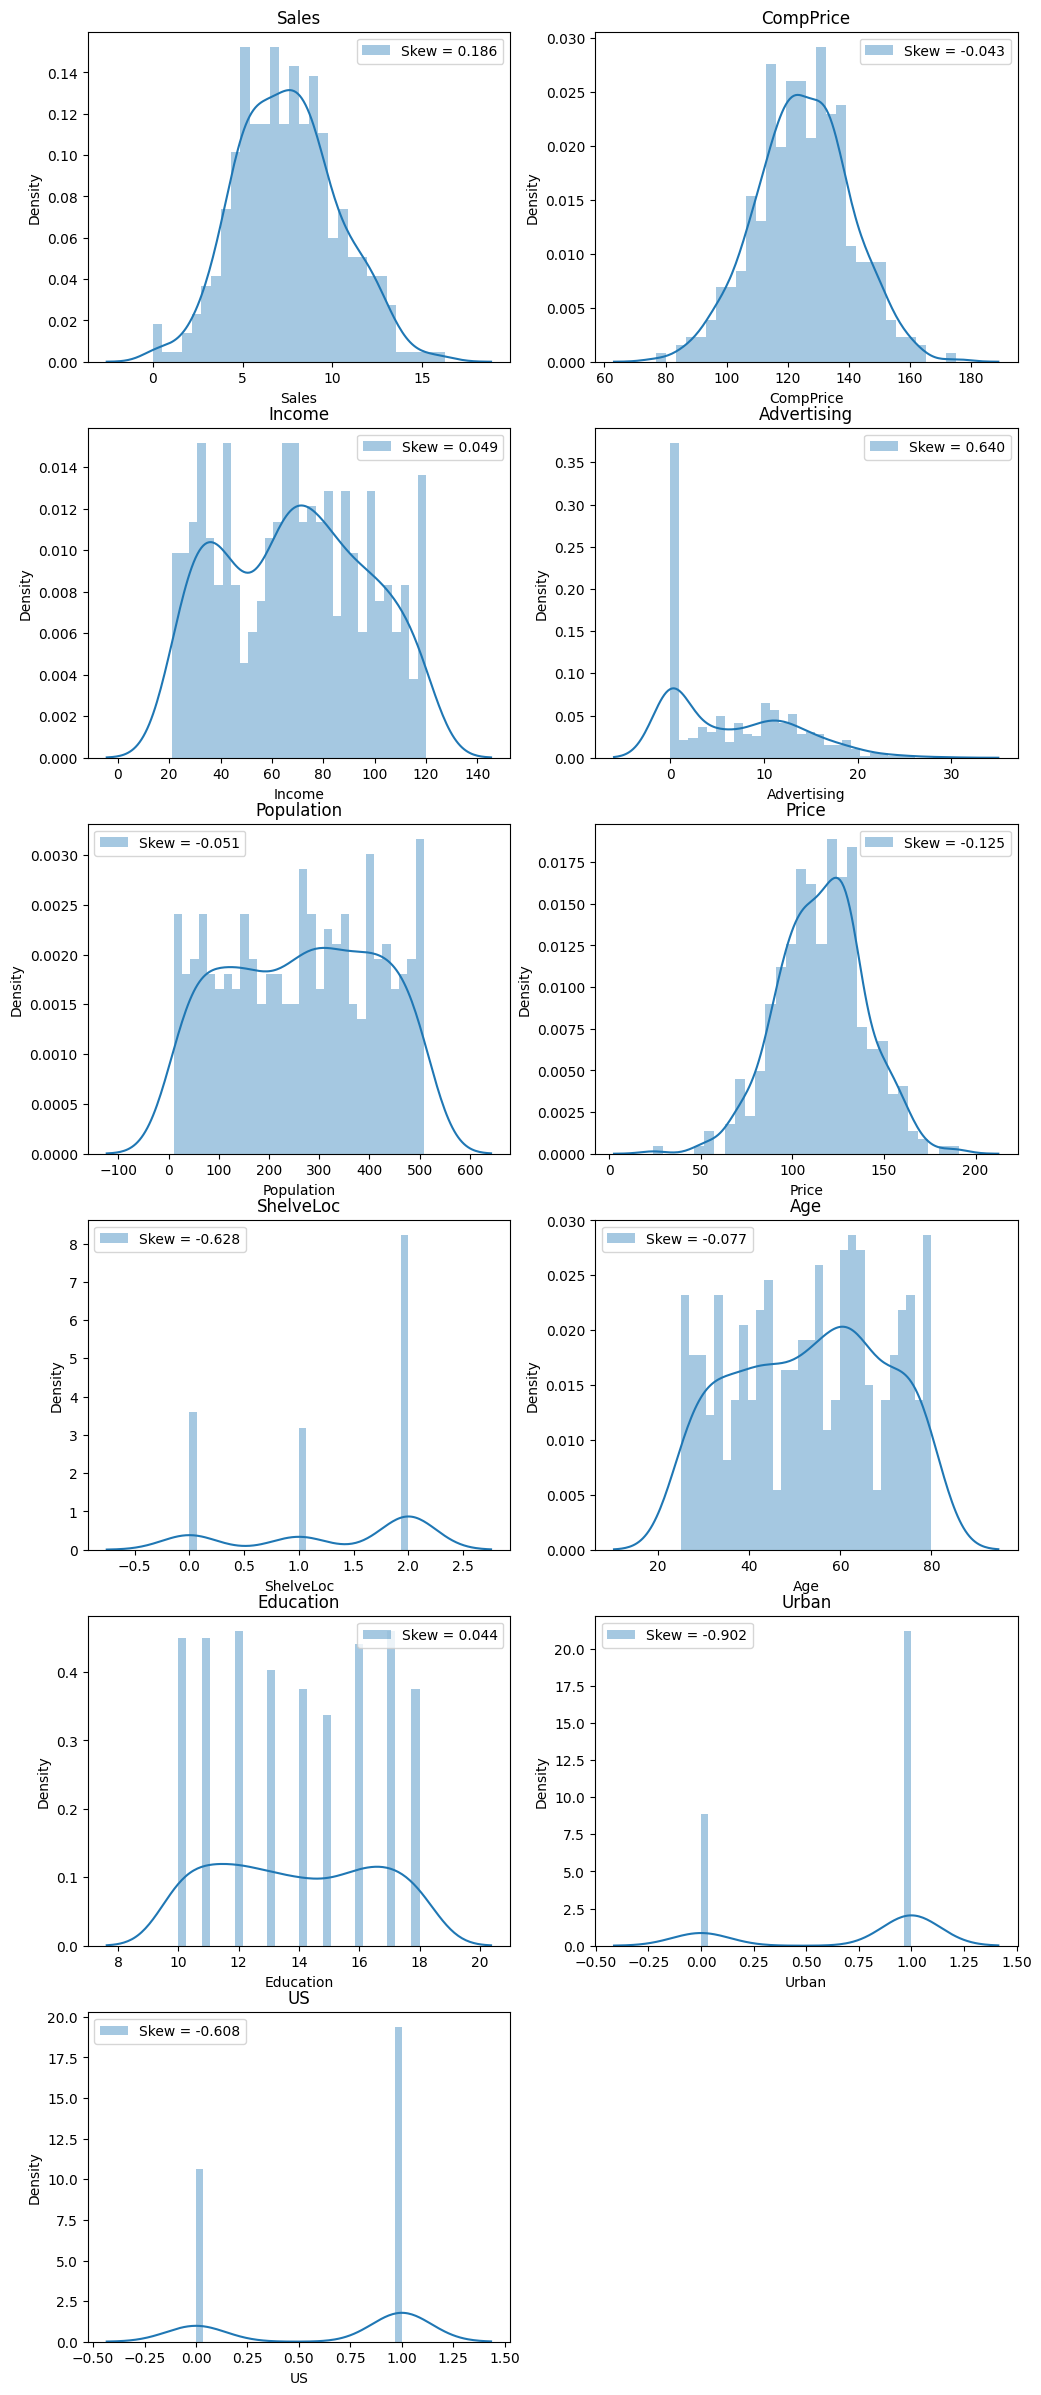

In [19]:
# distribution plots
subplots_per_row = 2
num_rows = (len(new_data.columns) + subplots_per_row - 1) // subplots_per_row
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(new_data.columns):
    ax = axes[i]
    skew = new_data[column].skew()
    sns.distplot(new_data[column], kde= True, label='Skew = %.3f' %(skew), bins=30, ax=ax)
    ax.legend(loc='best')
    ax.set_title(column)
    
# Hide any remaining empty subplots
for i in range(len(new_data.columns), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


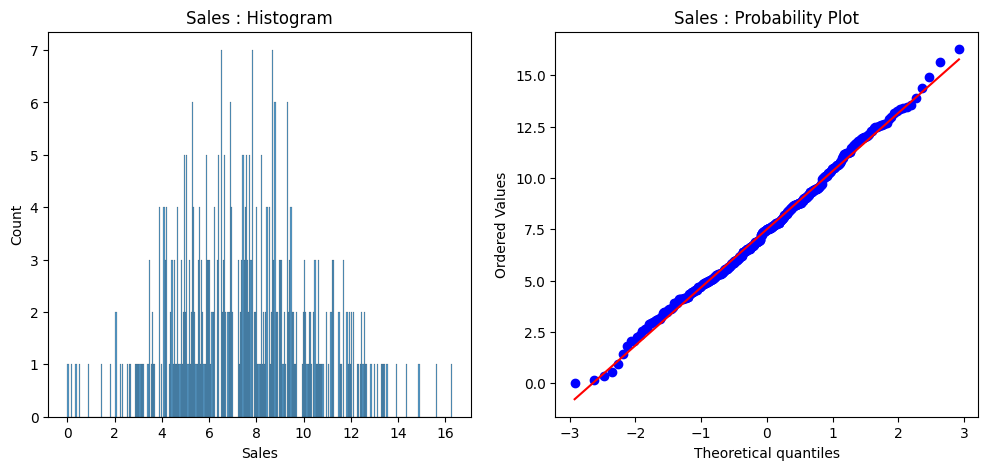

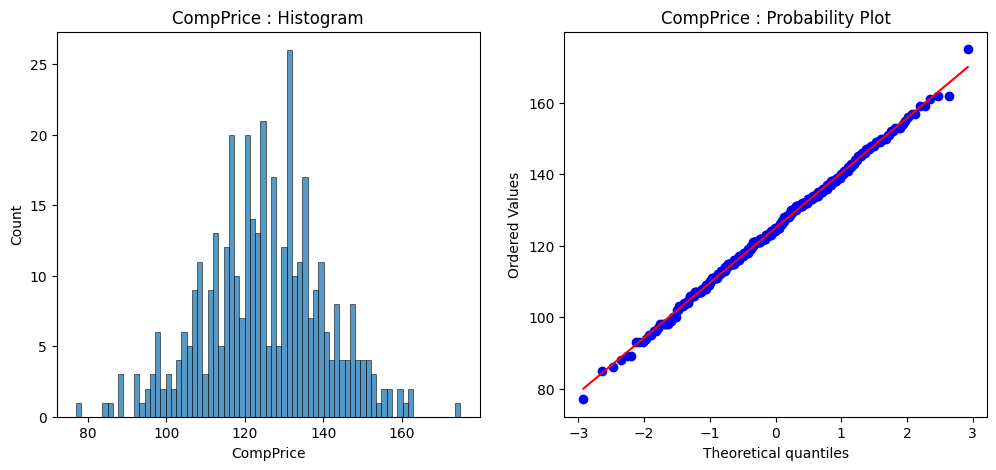

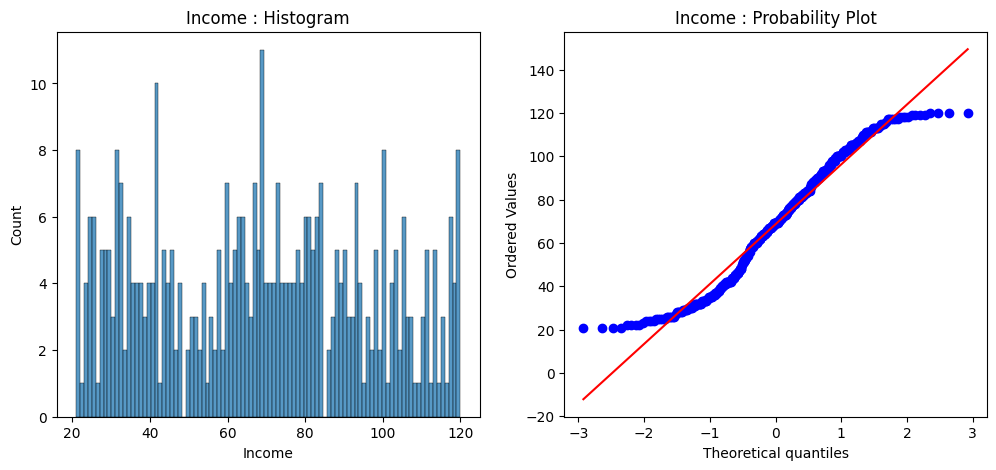

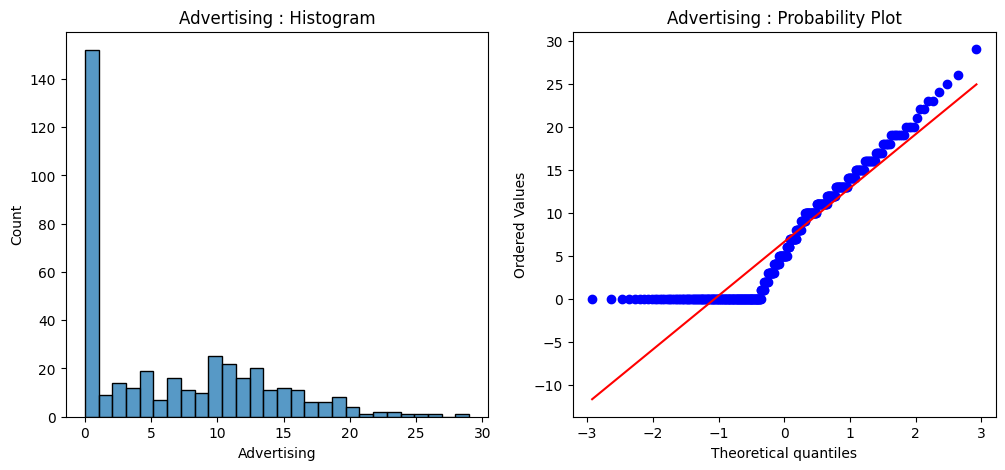

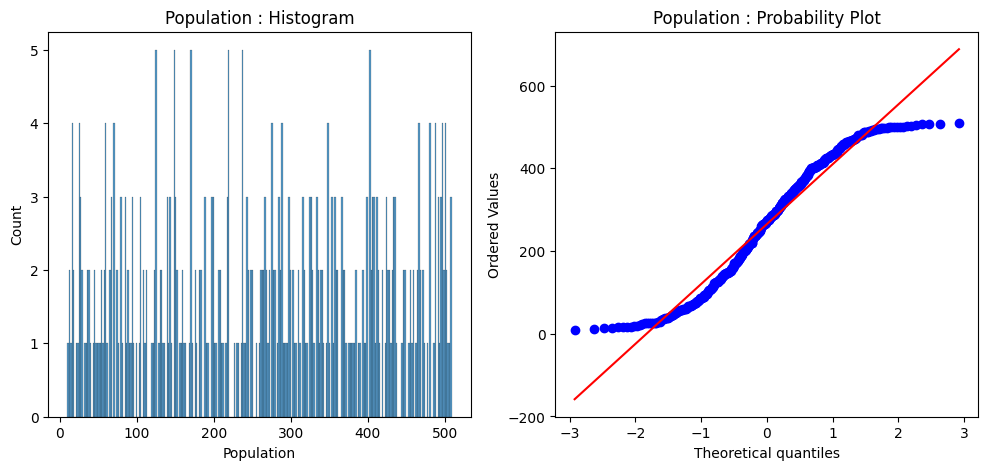

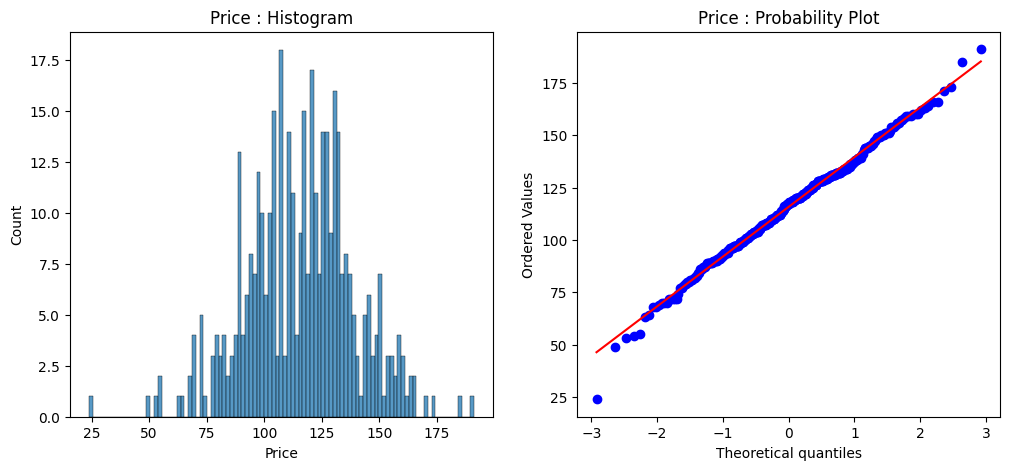

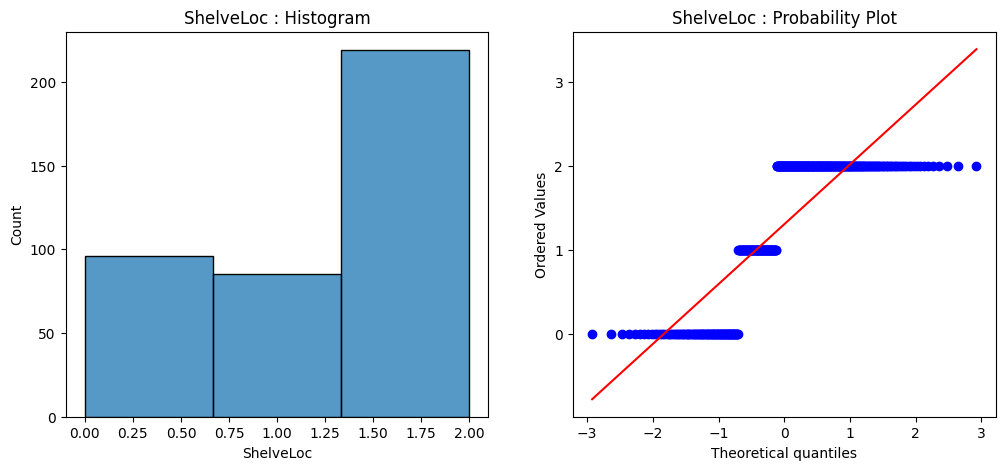

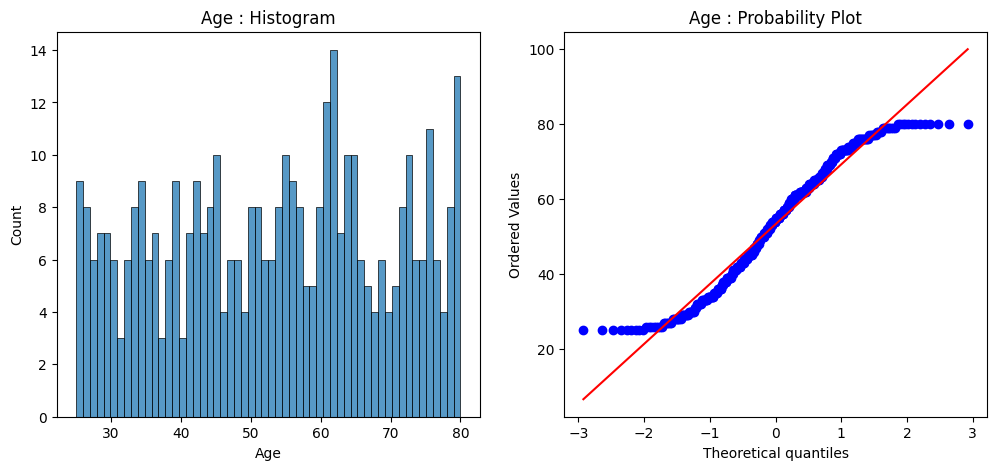

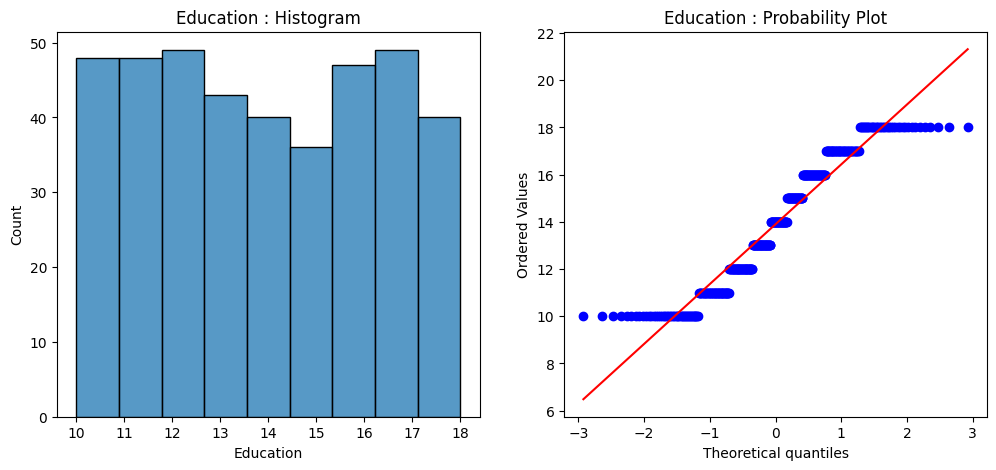

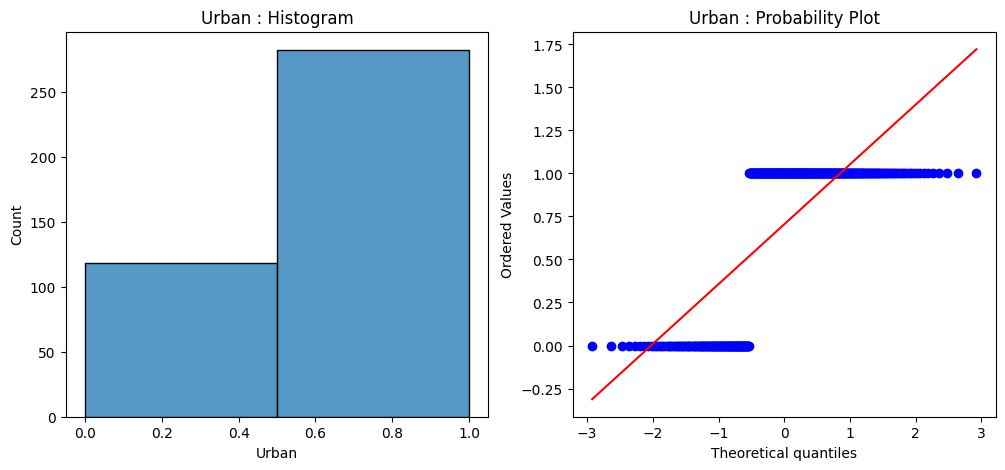

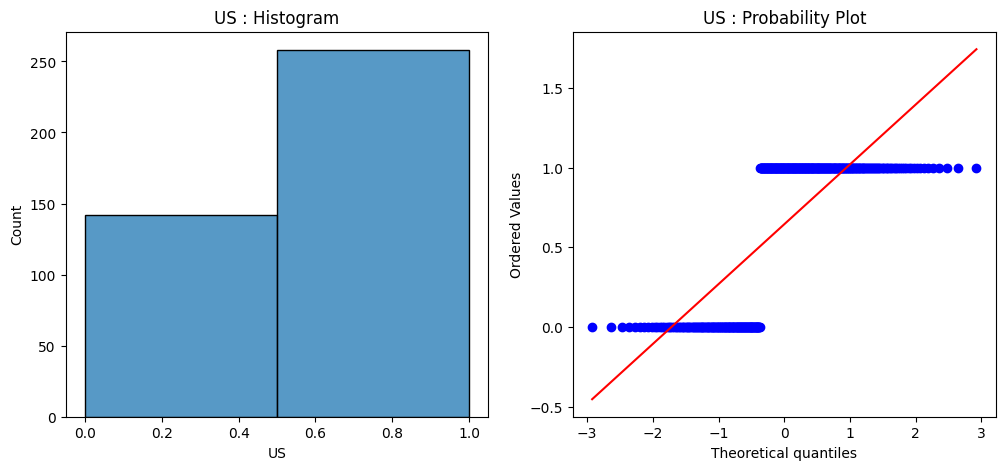

In [20]:
# Histogram & Probability Plot (Q-Q plot)
import pylab
import scipy.stats as stat

def plot_data(df, feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    # sns.barplot(x = df[feature].value_counts().index.tolist(), y = df[feature].value_counts().tolist())
    sns.histplot(df[feature], bins=len(df[feature].value_counts()))
    # df[feature].hist()
    plt.title(f'{feature} : Histogram')
    
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'{feature} : Probability Plot')

# Iterate through all columns
for column in new_data.columns:
    plot_data(new_data, column)
    plt.show()


# Analysing the Data

In [21]:
data_M=data.copy()
data_M

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [22]:
# feature engineer
def split(num):
    if num < 5:
        return 'Low'
    elif num >= 5 and num<10:
        return 'Medium'
    else:
        return 'High'
    
new_data['Sales'] = new_data['Sales'].apply(split)
data_M['Sales'] = data_M['Sales'].apply(split)
data_M

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Medium,100,79,7,284,95,Bad,50,12,Yes,Yes


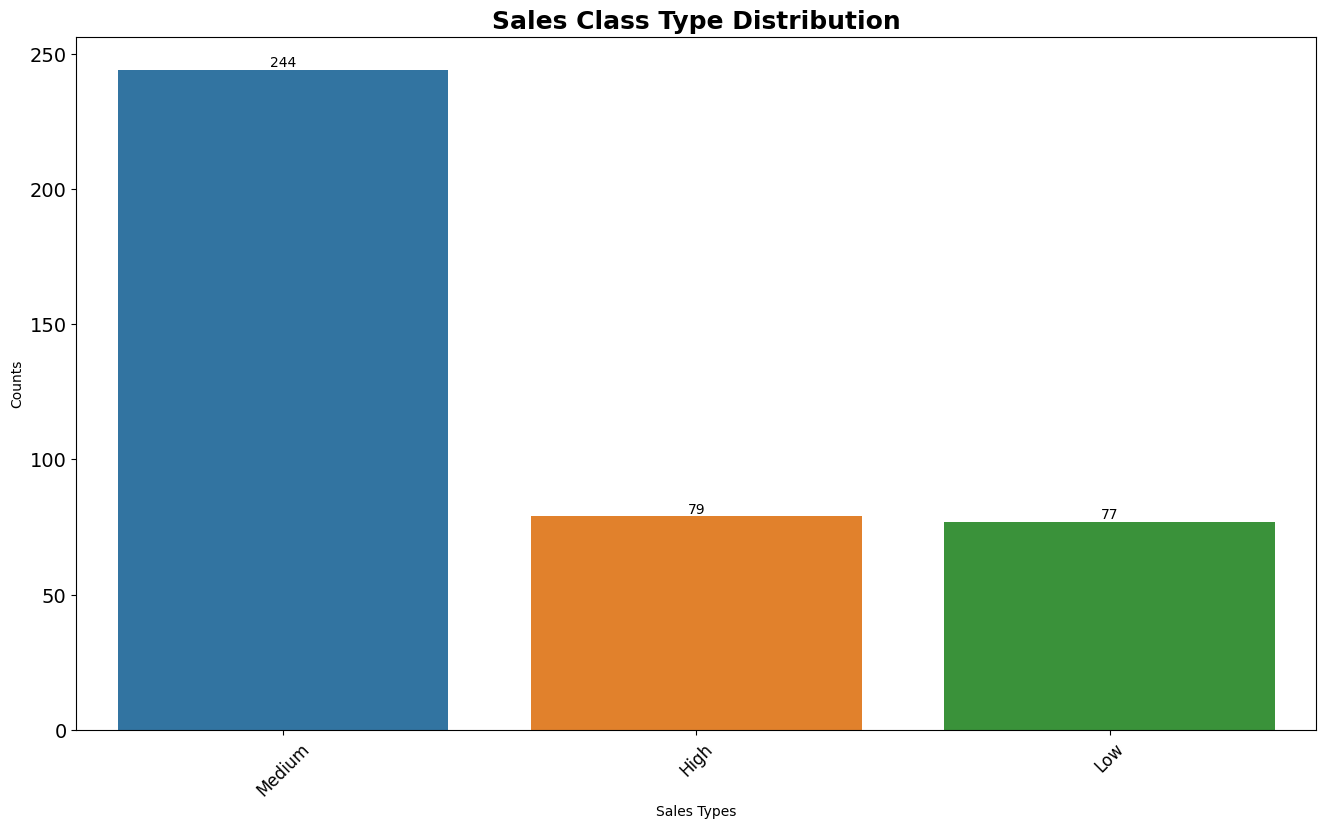

In [23]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = new_data['Sales'].value_counts().index.tolist(), y = new_data['Sales'].value_counts().tolist()) 
                # 'ax' -  to add labels to the bars
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Sales Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Sales Types')
plt.ylabel('Counts')
# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i,)

### Feature scaling

In [24]:
df_num = pd.get_dummies(data_M.iloc[:,1:])
df_num['Sales'] = data_M['Sales']
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_num['Sales'] = LE.fit_transform(df_num['Sales'])
df_num.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,True,False,False,False,True,False,True,2
1,111,48,16,260,83,65,10,False,True,False,False,True,False,True,0
2,113,35,10,269,80,59,12,False,False,True,False,True,False,True,0
3,117,100,4,466,97,55,14,False,False,True,False,True,False,True,2
4,141,64,3,340,128,38,13,True,False,False,False,True,True,False,1


# Model Building  & Testing

In [25]:
# x_train = new_data.iloc[:,:-1]    # new_data
# y_train = new_data.iloc[:,-1]
# x_test = new_data.iloc[:,:-1]
# y_test = new_data.iloc[:,-1]

X = df_num.drop(['Sales'],axis=1)
y = df_num[['Sales']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)
X_train

Shape of X_train:  (320, 14)
Shape of X_test:  (80, 14)
Shape of y_train:  (320, 1)
Shape of y_test (80, 1)


,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
93,145,30,0,67,104,55,17,False,False,True,False,True,True,False
23,121,31,0,292,109,79,10,False,False,True,False,True,True,False
299,135,40,17,497,96,54,17,False,False,True,True,False,False,True
13,115,28,11,29,86,53,18,False,True,False,False,True,False,True
90,115,22,0,491,103,64,11,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,123,81,8,198,81,80,15,True,False,False,False,True,False,True
72,115,45,0,432,116,25,15,False,False,True,False,True,True,False
396,139,23,3,37,120,55,11,False,False,True,True,False,False,True
235,126,32,8,95,132,50,17,False,False,True,False,True,False,True


## standardization

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.31854536, -1.39939402, -1.01731393, ...,  0.6352234 ,
         1.39132305, -1.39132305],
       [-0.27616777, -1.36298406, -1.01731393, ...,  0.6352234 ,
         1.39132305, -1.39132305],
       [ 0.65408156, -1.03529443,  1.53300301, ..., -1.5742493 ,
        -0.71874034,  0.71874034],
       ...,
       [ 0.91986708, -1.65426373, -0.567258  , ..., -1.5742493 ,
        -0.71874034,  0.71874034],
       [ 0.05606413, -1.3265741 ,  0.18283522, ...,  0.6352234 ,
        -0.71874034,  0.71874034],
       [-0.27616777, -0.99888447, -0.26722071, ...,  0.6352234 ,
        -0.71874034,  0.71874034]])

# Decision tree modeling

In [27]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_pred1

array([2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2])

In [28]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='gini', max_depth=4)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
y_pred2

array([2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2])

### Accuracy & classification report

model1:

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.67      0.33      0.44        18
           2       0.72      0.88      0.79        52

    accuracy                           0.70        80
   macro avg       0.65      0.54      0.57        80
weighted avg       0.69      0.70      0.67        80



model2:

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.6375
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.42      0.28      0.33        18
           2       0.69      0.81      0.74        52

    accuracy                           0.64        80
   macro avg       0.56      0.50      0.52        80
weighted avg       0.61      0.64      0.62        80



## confusion matrix

model1:


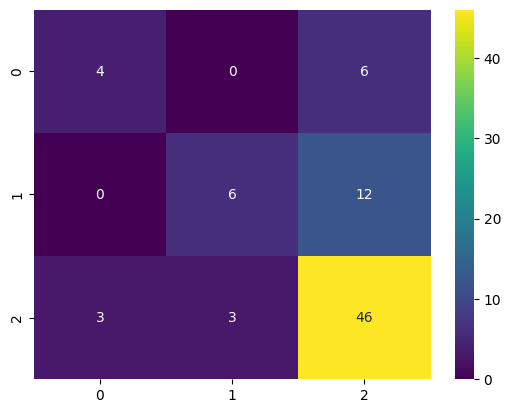

model2:


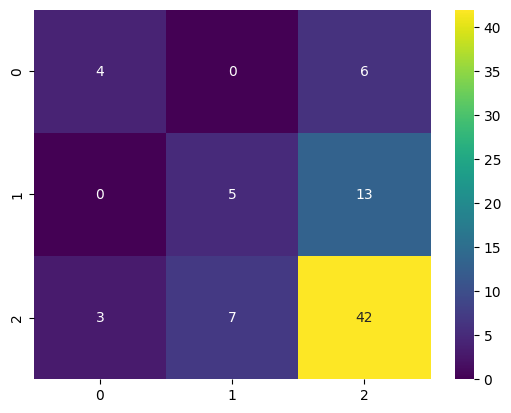

In [31]:
from sklearn.metrics import confusion_matrix
print('model1:')
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

print('model2:')
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

## compare the actual with the predicted:

model1:


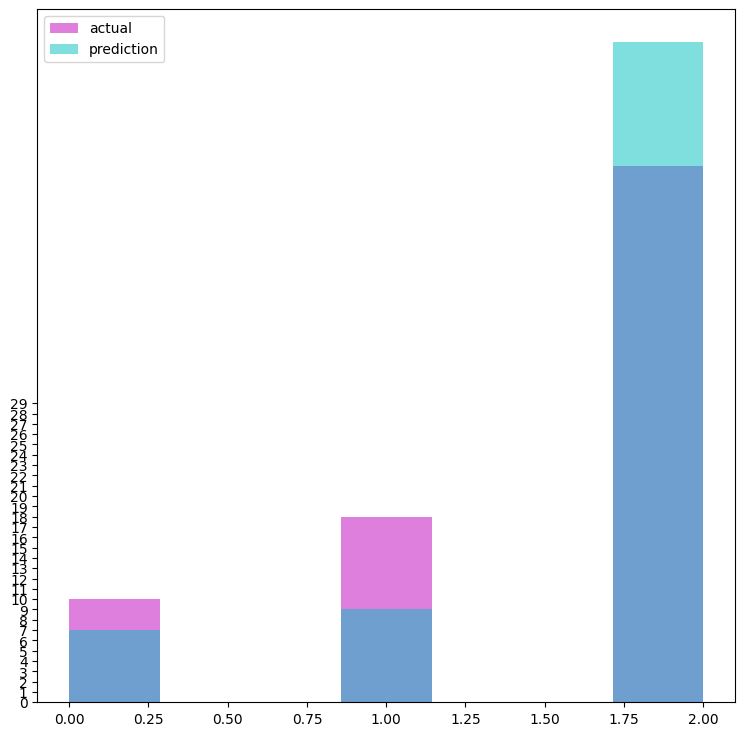

model2:


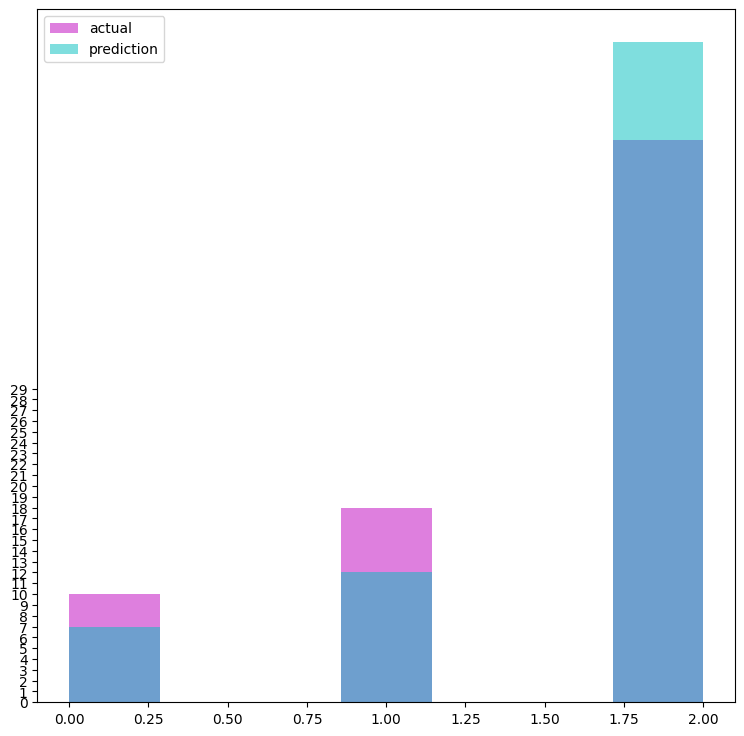

In [32]:
print('model1:')
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred1, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

print('model2:')
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred2, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

## Precision, Recall, and F1-Score:

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('model1:')
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

print('\nmodel2:')
precision = precision_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

model1:
Precision: 0.6886160714285714, Recall: 0.7, F1-Score: 0.674340770791075

model2:
Precision: 0.6127195550351289, Recall: 0.6375, F1-Score: 0.6170093701197293


## ROC Curve: Multi Classification problem

model1:


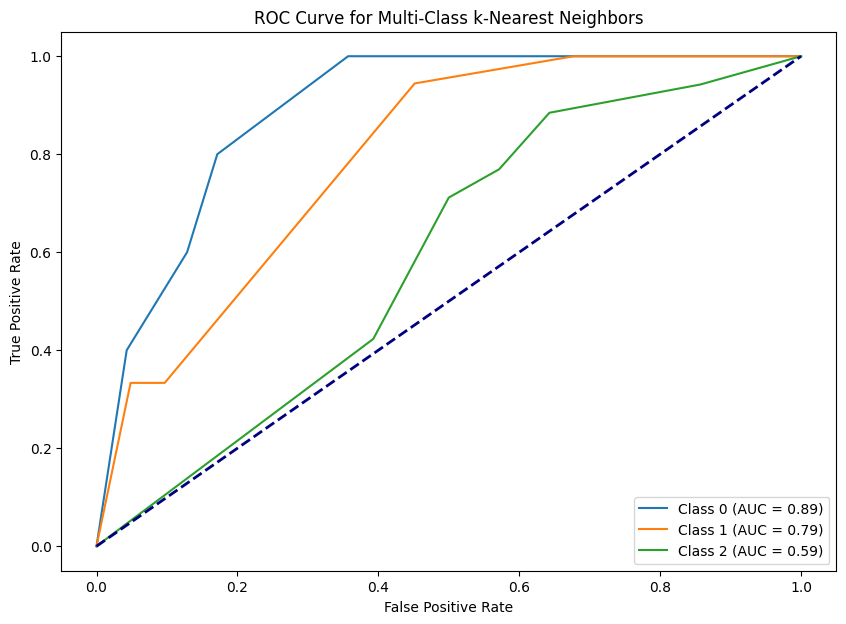


model2:


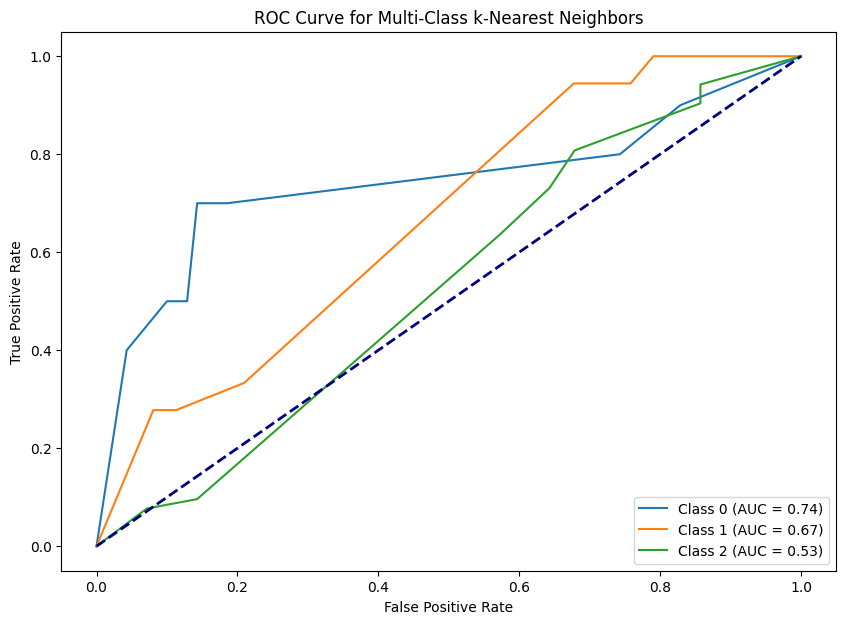

In [34]:
from sklearn.metrics import roc_curve, auc

print('model1:')
y_score = model1.predict_proba(X_test)
# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
uniq_out=np.unique(y_train)
num_classes = len(np.unique(y_train))
for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve(y_test == uniq_out[i], y_score[:, i], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {uniq_out[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class k-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

print('\nmodel2:')
y_score = model2.predict_proba(X_test)
# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve(y_test == uniq_out[i], y_score[:, i], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {uniq_out[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class k-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

Decision Tree Visualization:

model1:


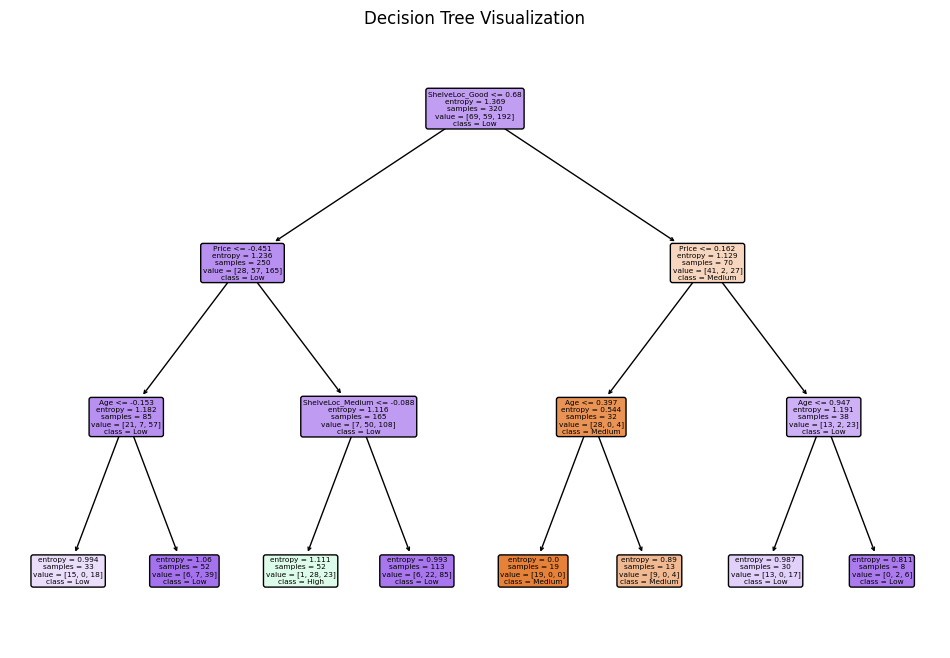


model2:


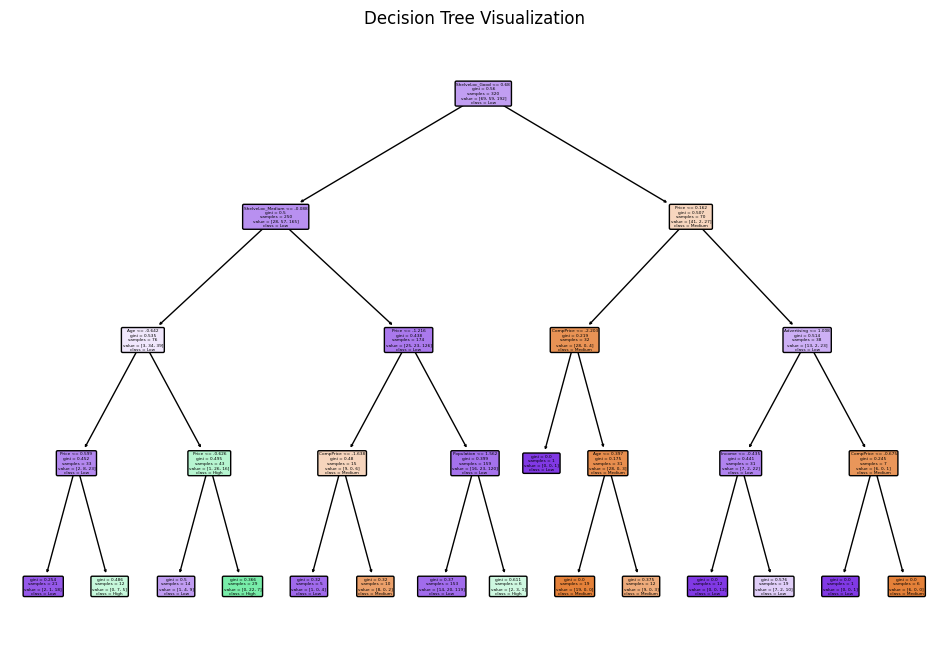

In [35]:
from sklearn.tree import plot_tree

feature_names = X.columns.tolist()
target_names = data_M['Sales'].unique().astype(str).tolist()
print('model1:')
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model1, filled=True, rounded=True, feature_names=feature_names, class_names=target_names)
plt.title("Decision Tree Visualization")
plt.show()

print('\nmodel2:')
# Plot the decision tree 
plt.figure(figsize=(12, 8))
plot_tree(model2, filled=True, rounded=True, feature_names=feature_names, class_names=target_names)
plt.title("Decision Tree Visualization")
plt.show()

##  model validation techniques

In [36]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
X = sc.fit_transform(X)

Cross-Validation:

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model1, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.65   0.6375 0.6    0.6875 0.6625]
Mean Accuracy: 0.6475000000000001


Stratified K-Fold Cross-Validation:

In [38]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model1, X, y, cv=skf)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.6625 0.675  0.6125 0.5625 0.5875]
Mean Accuracy: 0.62


Leave-One-Out Cross-Validation (LOOCV):

In [39]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(model1, X, y, cv=loo)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1

Shuffle-Split Cross-Validation:

In [40]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = cross_val_score(model1, X, y, cv=ss)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.65   0.6375 0.65   0.6125 0.65  ]
Mean Accuracy: 0.6399999999999999


Time Series Split:

In [41]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(model1, X, y, cv=tscv)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.53030303 0.62121212 0.54545455 0.66666667 0.75757576]
Mean Accuracy: 0.6242424242424243
